In [49]:
from pandas import DataFrame, read_csv, read_table

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas

%matplotlib inline

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

# Figure: Absorption Spectra

In [50]:
spectra_file = r'./dat/absorption_spectra.csv'
spectra = pd.read_csv(spectra_file)

(0, 15)

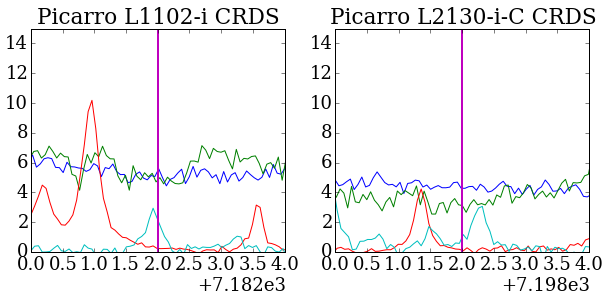

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
L1102 = 7184
breadth = 2
axes[0].set_title("Picarro L1102-i CRDS")
axes[0].plot(spectra.wn_etoh, spectra.abs10e6_etoh)
axes[0].plot(spectra.wn_meoh, spectra.abs10e6_meoh)
axes[0].plot(spectra.wn_h2o, spectra.abs10e6_h2o)
axes[0].plot(spectra.wn_hdo, spectra.abs10e6_hdo)
axes[0].plot([L1102, L1102], [0, 15], lw = 2)
axes[0].set_xlim([L1102-breadth, L1102+breadth])
axes[0].set_ylim([0, 15])

L2130 = 7200
axes[1].set_title("Picarro L2130-i-C CRDS")
axes[1].plot(spectra.wn_etoh, spectra.abs10e6_etoh)
axes[1].plot(spectra.wn_meoh, spectra.abs10e6_meoh)
axes[1].plot(spectra.wn_h2o, spectra.abs10e6_h2o)
axes[1].plot(spectra.wn_hdo, spectra.abs10e6_hdo)
axes[1].plot([L2130, L2130], [0, 15], lw = 2)
axes[1].set_xlim([L2130-breadth, L2130+breadth])
axes[1].set_ylim([0, 15])


In [52]:
etoh_file = r'./dat/etoh_impacts.csv'
etoh = pd.read_csv(etoh_file)

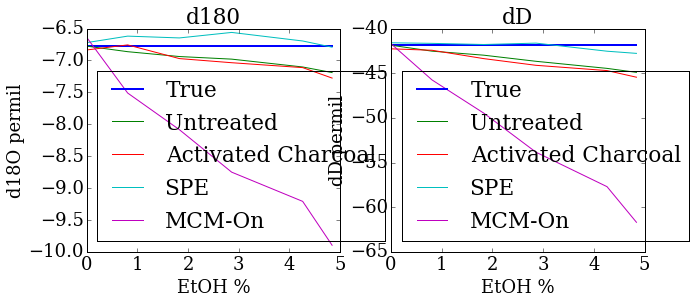

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].set_title("d180")
axes[0].set_xlabel("EtOH %")
axes[0].set_ylabel("d18O permil")
axes[0].plot(etoh.etoh, etoh.d18O_true, lw = 2, label="True")
axes[0].plot(etoh.etoh, etoh.d18O_untrt, label="Untreated")
axes[0].plot(etoh.etoh, etoh.d18O_ac, label="Activated Charcoal")
axes[0].plot(etoh.etoh, etoh.d18O_spe, label="SPE")
axes[0].plot(etoh.etoh, etoh.d18O_mcmon, label="MCM-On")
#axes[0].set_xlim([L1102-breadth, L1102+breadth])
#axes[0].set_ylim([0, 15])
axes[0].legend(loc=3) # upper left corner

axes[1].set_title("dD")
axes[1].set_xlabel("EtOH %")
axes[1].set_ylabel("dD permil")
axes[1].plot(etoh.etoh, etoh.dD_true, lw = 2, label="True")
axes[1].plot(etoh.etoh, etoh.dD_untrt, label="Untreated")
axes[1].plot(etoh.etoh, etoh.dD_ac, label="Activated Charcoal")
axes[1].plot(etoh.etoh, etoh.dD_spe, label="SPE")
axes[1].plot(etoh.etoh, etoh.dD_mcmon, label="MCM-On")
#axes[0].set_xlim([L1102-breadth, L1102+breadth])
#axes[0].set_ylim([0, 15])
axes[1].legend(loc=3, ) # upper left corner
